In [1]:
# @title ** Object Detection with YOLOv8 **

The purpose of this project is to master a Python code for Object Detection using YOLOv8. Therefor, I'm going to use images on dogs and cats.

In [2]:
# @title 0. Download dataset
# Load requested libraries
import kagglehub
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO
#from google.colab.patches import cv2_imshow

c:\Users\Visiteur\Desktop\GitHub Projects\Computer-Vision\venvComputerVision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# DO NOT RUN
# Download latest version
#path = kagglehub.dataset_download("alvarole/asirra-cats-vs-dogs-object-detection-dataset")

#print("Path to dataset files:", path)

In [3]:
path_data = "./Data/Animals Data"

* Case 1: Object Detection on a single image

In [4]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

In [5]:
# Define some functions
def detect_objects(image_path):
    # Read image
    image = cv2. imread(image_path)

    # Achieve the object detection task
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3),
                         results.names[int(class_id)]])

    return image, detections

def draw_boxes(image, detections):
    for detection in detections:
        x1, y1, x2, y2, score, class_name = detection
        # Draw the bound boxes
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Add label with class' name and score
        label = f"{class_name} {score}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image



'./Data/Animals Data\\cat.0.jpg'

In [11]:
# Detect object and get image with bound boxes draw
# ==> Approach 1: Open image in another window
# Define image path
image_path = os.path.join(path_data, "cat.0.jpg")
image_path

# Detect objects in the image
image, detections = detect_objects(image_path)
image_with_boxes = draw_boxes(image, detections)

# Display image with boxes
cv2.imshow("Object Detection", image_with_boxes)
cv2.waitKey(0)
cv2.destroyAllWindows()

0: 480x640 2 cats, 455.0ms
Speed: 16.2ms preprocess, 455.0ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)



0: 480x640 2 cats, 310.5ms
Speed: 8.2ms preprocess, 310.5ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


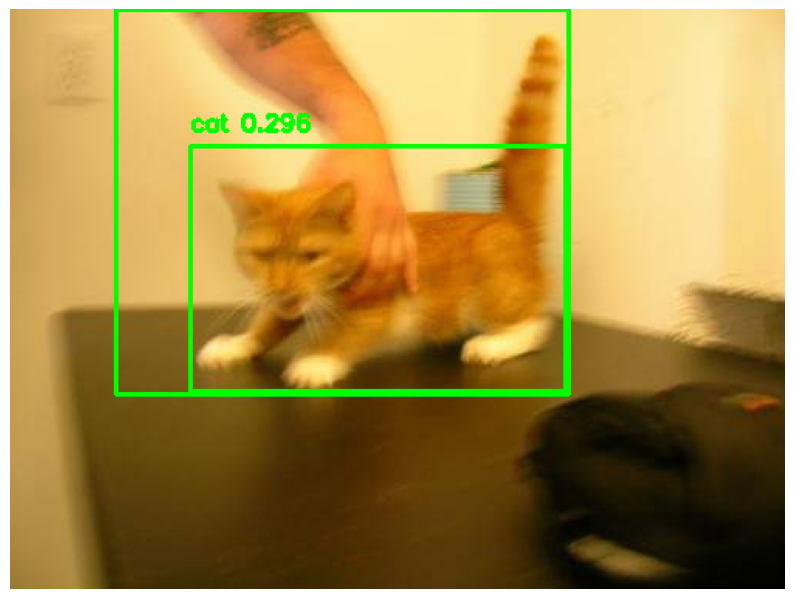

In [12]:
# Detect object and get image with bound boxes draw
# ==> Approach 2: Open image as a notebook output

# Define image path
image_path = os.path.join(path_data, "cat.0.jpg")

# Detect objects in the image
image, detections = detect_objects(image_path)
image_with_boxes = draw_boxes(image, detections)

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display image in notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Process each 20 random images of the dataframe
# ==> Approch 1: Open image in another window

# Initialize a List to store images with '.jpg' extension paths
jpg_files = []

for file_name in os.listdir(path_data):
    if file_name.endswith('.jpg'):
        jpg_files.append(file_name)

# Build the dataframe
df_jpg_files = pd.DataFrame(jpg_files, columns=['JPG FILES'])

# Shuffle the dataframe
np.random.seed(0)
df_jpg_files_shuffled = df_jpg_files.sample(frac=1).reset_index(drop=True)
df_images = df_jpg_files_shuffled

print(f"Number of images: {len(df_images)}")
print("\nFirst few rows:")
print(df_images.head())

Number of images: 1100

First few rows:
      JPG FILES
0  cat.3862.jpg
1  dog.3527.jpg
2  cat.3943.jpg
3   dog.207.jpg
4   dog.460.jpg


In [ ]:
# Process images with keyboard interaction
def display_images_interactive():
    # Sample 20 random images from the dataframe
    sampled_images = df_images.sample(20).reset_index(drop=True)
    current_idx = 0
    
    while True:
        # Get current image path
        image_path = os.path.join(path_data, sampled_images.iloc[current_idx]['JPG FILES'])
        print(f"Processing image {current_idx + 1}/20: {image_path}")
        
        # Detect objects and draw boxes
        image, detections = detect_objects(image_path)
        if image is not None:
            image_with_boxes = draw_boxes(image, detections)
            
            # Display image
            cv2.imshow("Object Detection (→: next image, q/ESC: quit)", image_with_boxes)
            
            # Wait for key press
            key = cv2.waitKey(0) & 0xFF
            
            # Handle key press
            if key == ord('q') or key == 27:  # q or ESC
                break
            elif key == ord('n'):  # N key for next image
                current_idx = (current_idx + 1) % len(sampled_images)
            
    cv2.destroyAllWindows()

# Run the interactive display
display_images_interactive()

* Case 2: Object Detection a set of images

Purpose: Create a dataframe of images (files with the extension '.jpg')

In [11]:
# Initialize a List to store images with '.jpg' extension paths
jpg_files = []

for file_name in os.listdir(path_data):
    if file_name.endswith('.jpg'):
        jpg_files.append(file_name)

# Build the dataframe
df_jpg_files = pd.DataFrame(jpg_files, columns=['JPG FILES'])

# Shuffle the dataframe
np.random.seed(0)
df_jpg_files_shuffled = df_jpg_files.sample(frac=1).reset_index(drop=True)
df_images = df_jpg_files_shuffled

print(f"{df_images}")

         JPG FILES
0     cat.3862.jpg
1     dog.3527.jpg
2     cat.3943.jpg
3      dog.207.jpg
4      dog.460.jpg
...            ...
1095   dog.489.jpg
1096   dog.290.jpg
1097  dog.3504.jpg
1098   dog.106.jpg
1099   dog.219.jpg

[1100 rows x 1 columns]


In [ ]:
"""Purpose: Detect object for each image and get them with bound boxes draw. Due to the number of rows (1100), I'll display only tje top 20"""
# Process each 20 random images of the dataframe
for index, row in df_images.sample(20).iterrows():
    image_path = os.path.join(path_data, row['JPG FILES'])
    print(f"Process of the image: {image_path}")

    # Detect objects in each image and drow corresponding boxes
    image, detections = detect_objects(image_path)
    if image is not None:
        image_with_boxes = draw_boxes(image, detections)

        # Display each image and his boxes
        cv2.imshow("Object Detection", image_with_boxes)

Process of the image: ./Data/Animals Data\cat.3885.jpg



0: 512x640 1 cat, 1 couch, 416.3ms
Speed: 31.6ms preprocess, 416.3ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 640)
Process of the image: ./Data/Animals Data\cat.3739.jpg

0: 640x640 (no detections), 699.9ms
Speed: 38.4ms preprocess, 699.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Process of the image: ./Data/Animals Data\dog.3526.jpg

0: 640x640 1 dog, 295.5ms
Speed: 13.6ms preprocess, 295.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Process of the image: ./Data/Animals Data\cat.3853.jpg

0: 608x640 1 cat, 1 couch, 351.9ms
Speed: 9.8ms preprocess, 351.9ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 640)
Process of the image: ./Data/Animals Data\cat.3629.jpg

0: 544x640 1 cat, 2 bottles, 1 refrigerator, 291.9ms
Speed: 6.6ms preprocess, 291.9ms inference, 3.5ms postprocess per image at shape (1, 3, 544, 640)
Process of the image: ./Data/Animals Data\dog.467.jpg

0: 480x640 2 dogs, 228.8ms
Speed: 8.7ms pre

: 